In [3]:
from transformers import GPT2LMHeadModel

In [3]:
model_hf = GPT2LMHeadModel.from_pretrained("gpt2") # 124 M
sd_hf = model_hf.state_dict()

for k, v in sd_hf.items():
    print(k, v.shape)

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [4]:
sd_hf["transformer.wpe.weight"].view(-1)[:20]

tensor([-0.0188, -0.1974,  0.0040,  0.0113,  0.0638, -0.1050,  0.0369, -0.1680,
        -0.0491, -0.0565, -0.0025,  0.0135, -0.0042,  0.0151,  0.0166, -0.1381,
        -0.0063, -0.0461,  0.0267, -0.2042])

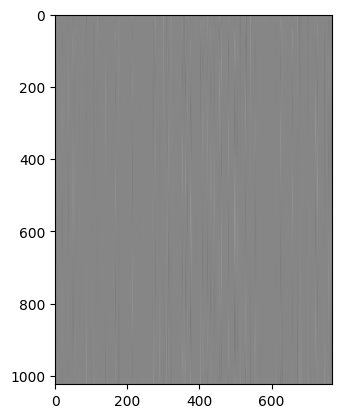

In [5]:
import matplotlib.pyplot as plt
plt.imshow(sd_hf["transformer.wpe.weight"], cmap="gray")

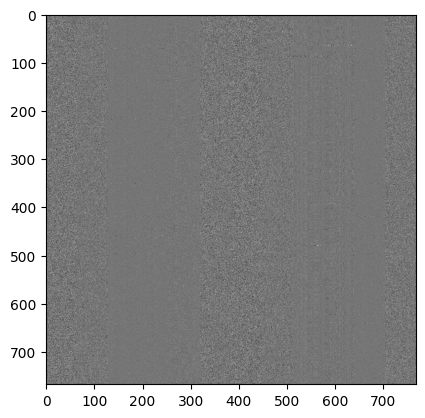

In [9]:
plt.imshow(sd_hf["transformer.h.1.attn.c_attn.weight"][:768,:768], cmap="gray")

In [11]:
from transformers import pipeline, set_seed
generator = pipeline('text-generation', model='gpt2')
set_seed(42)
generator("Hello, I'm a language model,", max_length=30, num_return_sequences=5)

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': 'Hello, I\'m a language model, so you can\'t just use the same data model and just use different languages. There\'s a lot of overlap between languages because there are so many different languages.\n\nBut in a lot of cases, I have a lot of different languages. There is a lot of confusion about what\'s right. I sometimes have to put a lot of stuff in the right order, but then it\'s not so clear what it is. Sometimes there are multiple languages that are using different languages. So I have a lot of confusion.\n\nSo, for example, if you\'re doing a lot of cross-platform development, where you\'re developing for a large cross-platform platform, you\'re using a lot of different languages. And you may not be able to understand the language. But if you do a lot of cross-platform development, you can understand the language.\n\nAnd so there\'s a lot of confusion.\n\nWhen I talk to people about languages, I\'m kind of using the same language, but it\'s different.\n\nSo, I 

In [4]:
import tiktoken

import torch
from torch.nn import functional as F

model = GPT2LMHeadModel.from_pretrained("gpt2")
model.eval()

model.to("cuda")
torch.manual_seed(42)
torch.cuda.manual_seed(42)

tokens = [15496, 11, 314, 1101, 257, 3303, 2746, 11]
x = torch.tensor(tokens, dtype=torch.long).unsqueeze(0).repeat(5, 1).to("cuda")

# Generate tokens until the sequence length reaches the maximum length
while x.size(1) < 30:
    # Disable gradient calculation for inference
    with torch.no_grad():
        # Get the logits from the model
        logits = model(x)[0]
        # Get the logits for the last token in the sequence
        logits = logits[:, -1, :]
        # Convert the logits to probabilities using softmax
        probs = F.softmax(logits, dim=-1)
        # Get the top-k probabilities and indices from the distribution
        tokprobs, topk_indices = torch.topk(probs, k=50, dim=-1)
        # Sample the next token from the top-k probabilities
        ix = torch.multinomial(tokprobs, num_samples=1)
        # Gather the sampled token indices
        xcol = torch.gather(topk_indices, -1, ix)
        # Append the new token to the sequence
        x = torch.cat((x, xcol), dim=1)

enc = tiktoken.get_encoding("gpt2")

# Decode and print the generated sequences
for i in range(5):
    tokens = x[i, :30].tolist()
    decoded = enc.decode(tokens)
    print(">", decoded)

> Hello, I'm a language model, not a program.

So this morning I started studying for the interview in the lab. This was not
> Hello, I'm a language model, and one of the main things that bothers me when they create languages is how easy it becomes to create something that
> Hello, I'm a language model, and I wrote it off on the grounds that a language model would make me more fluent. But I'm not
> Hello, I'm a language model, I really like languages. I like languages because like, they're good. And the way we talk about languages
> Hello, I'm a language model, a language model I'm using for data modelling. All I did was test the results and then I wrote some


In [1]:
with open("../data/input.txt", "r") as f:
    text = f.read()
data = text[:1000]
print(data[:100])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You
